## Modules and helper functions

In [ ]:
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

np.random.seed(0) # ensure consistent results

## Linear regression

We'll use the [diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) dataset, in which `X` is 10 baseline variables and `y` is a quantitative measure of disease progression one year after baseline. We'll use `pandas` to print the correlation matrix for all 10 features.

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)
X.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


We can see that some of the serum measurements (e.g. "s1" and "s2")
are highly correlated.

**1. Split `X` and `y` into `X_train`, `X_test`, `y_train`, `y_test`, with 80% training data.**

**2. Fit a [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to only the training data. Use the fit model to transform both the training and testing data.**

**3. Fit a [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model named `lr` to the training data.**

In [ ]:
# YOUR CODE HERE
## Step 1: split x and y to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,)


## Step 2: fit StandardScaler
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

## Step 3: linear regression of train data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coefficients:")
print(list(zip(X.columns, lr.coef_)))
print()
print("Train R^2: %f"%lr.score(X_train, y_train))
print("Test R^2:  %f"%lr.score(X_test, y_test))

Coefficients:
[('age', -1.7214650042288802), ('sex', -11.58569419683252), ('bmi', 27.510691743062594), ('bp', 14.371208604883797), ('s1', -31.22139382022876), ('s2', 15.265183934731771), ('s3', 1.167947468476762), ('s4', 8.184468569634838), ('s5', 35.83753415408526), ('s6', 2.1232312877511093)]

Train R^2: 0.553925
Test R^2:  0.332233


## LASSO

**4. Fit a [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) model named `lr` to the training data.**

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Lasso
lr = Lasso(alpha=0.1)
lr.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
print("Coefficients:")
print(list(zip(X.columns, lr.coef_)))
print()
print("Train R^2: %f"%lr.score(X_train, y_train))
print("Test R^2:  %f"%lr.score(X_test, y_test))

Coefficients:
[('age', -1.4834969917177376), ('sex', -11.350398946436327), ('bmi', 27.682153636153316), ('bp', 14.118629147285917), ('s1', -21.175332235913363), ('s2', 7.332782370564025), ('s3', -3.255092072328335), ('s4', 6.717378650197147), ('s5', 31.92829185921701), ('s6', 2.0791447588766507)]

Train R^2: 0.553604
Test R^2:  0.330229


We can see that some of the coefficients have dropped to 0. These are for some of the serum measurements, which we saw above were correlated with each other and thus redundant.

## Logistic regression elastic net

Logistic regression can use LASSO (L1) and ridge (L2) regularization too. When they're both used it's called *elastic net*. Let's go back to our breast cancer dataset, which has a binary class label.  First, we'll load, scale and split.

In [ ]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [17]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


**5. Fit a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model called `lr` to `X_train` and `y_train`, using elastic net regularization with a C of 1 and an L1 ratio of 0.5 (equal mix).**
- Hint: you will need to change the *solver* to one compatible with elastic net. These are listed in the documentation for the `solver` argument.
- Hint: if you get warnings about not converging, try more max iterations.

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1, max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(C=1, l1_ratio=0.5, max_iter=10000, penalty='elasticnet',
                   solver='saga')

Let's look at the coefficients. Note that the first dimension of `coef_` in a `LogisticRegression` is the class, which there is only one of for binary classification.

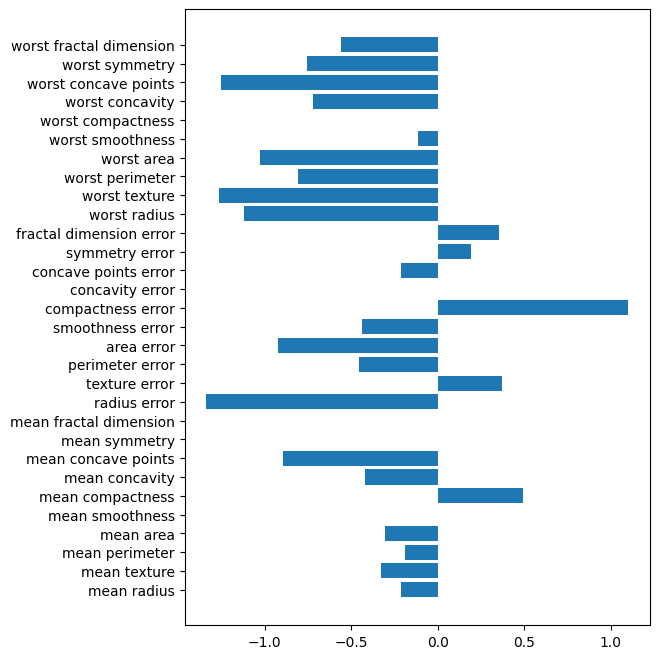

In [ ]:
plt.figure(figsize=(6, 8))
plt.barh(X.columns, lr.coef_[0])
plt.show()

In [ ]:
print("Training acc: %f"%accuracy_score(y_train, lr.predict(X_train)))
print("Testing acc:  %f"%accuracy_score(y_test, lr.predict(X_test)))

Training acc: 0.989011
Testing acc:  0.973684


# NEW L1 ratio and regularization strength (C) for discussion

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
new_lr = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.75, C=10, max_iter=10000)
new_lr.fit(X_train, y_train)

LogisticRegression(C=10, l1_ratio=0.75, max_iter=10000, penalty='elasticnet',
                   solver='saga')

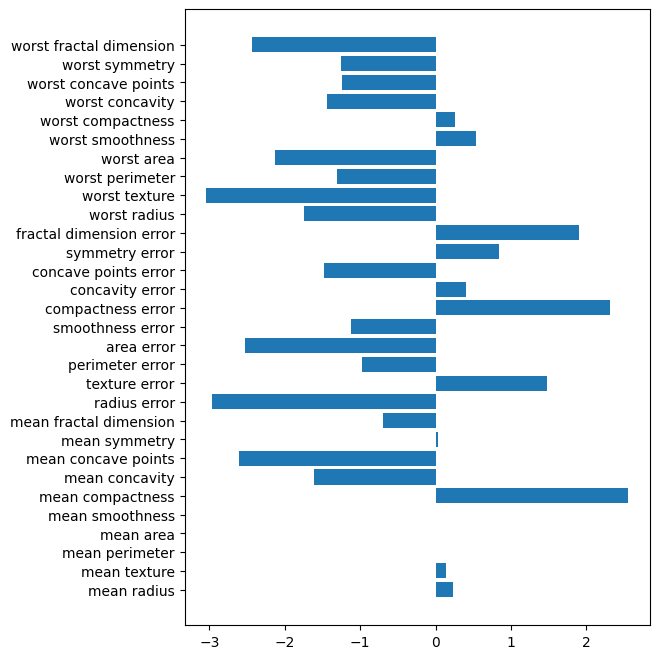

In [ ]:
plt.figure(figsize=(6, 8))
plt.barh(X.columns, new_lr.coef_[0])
plt.show()

In Scikit-learn, classifiers that use cut-offs (like `LogisticRegression`) can provide raw prediction probabilities instead of labels using `predict_proba`. This will return an array with a column for each label (even if there are only two).

**6. Use the `predict_proba` function of `lr` to generate raw prediction probabilities for `X_test`. Use slicing to extract the second column (for label "1") and store in `proba`.**

In [ ]:
# YOUR CODE HERE
proba = lr.predict_proba(X_test)[:,1]

Now let's use the raw probabilities to draw a ROC curve and find the AUC.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


AUC: 0.998438


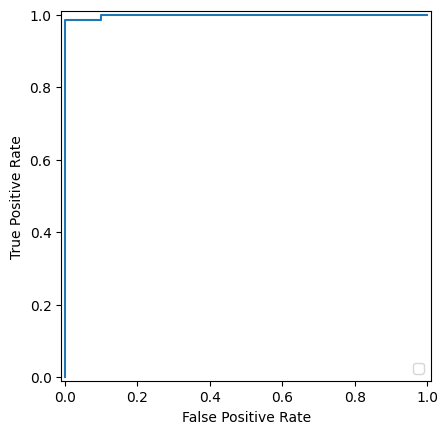

In [ ]:
from sklearn.metrics import roc_curve,RocCurveDisplay,roc_auc_score

fpr, tpr, _ = roc_curve(y_test, proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print("AUC: %f"%roc_auc_score(y_test, proba))